In [ ]:
!pip install keras

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
def plot_cm(y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    sns.heatmap(                                                ########## FUNÇÃO PARA PLOTAR A MATRIX DE CONFUSAO
        cm,
        annot=True,
        fmt=".0f"
    )
    plt.title(f'acuracia: {accuracy_score(y_test,y_pred)}')

In [ ]:
(X_train,y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data() # carregando/baixando o modelo disponível na biblioteca do keras

In [ ]:
# X_train = X_train[:20000]
# y_train = y_train[:20000]
# X_test = X_test[:20000]            ############## Selecionando os 20 mil primeiros dados. Eu rodei esse código somente na aula. Para o
# y_test = y_test[:20000]             ############# o exercício proposto (decision tree e logistic regression) estou pulando essa parte

In [ ]:
X_train=X_train.astype(float)/255
X_test=X_test.astype(float)/255              ########### NORMALIZAÇÃO DOS DADOS


In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [ ]:
X_train = X_train.reshape(60000,784)

In [ ]:
X_test = X_test.reshape(10000,784)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

# SVM

In [ ]:
X_test = X_test[:10000] ###### somente rodado para SVM

In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC(decision_function_shape='ovr', verbose=True)

In [ ]:
X_train.shape, y_train.shape

((60000, 784), (60000,))

In [ ]:
clf.fit(X_train, y_train) ########### 5 min para fazer o fit com 60 mil dados

[LibSVM]

SVC(verbose=True)

In [ ]:
y_pred = clf.predict(X_test) # 3 min pra prever um valor

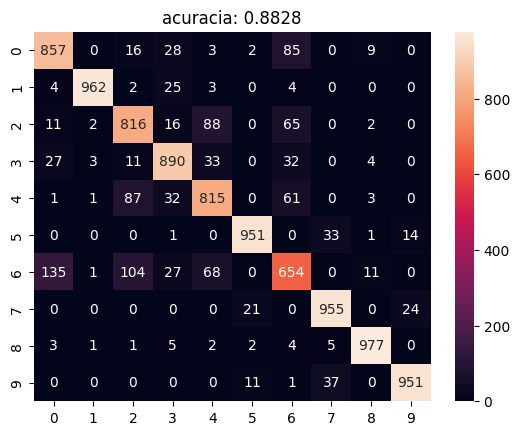

In [ ]:
plot_cm(y_test,y_pred)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier ######### importando o classificador
from sklearn.model_selection import RandomizedSearchCV ####### importando RandomizedSearchCV para fazer a busca das melhores arvores passando multiplos parametros

In [ ]:
clf = DecisionTreeClassifier() # instanciando o modelo

In [ ]:
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random']               ############## DICIONÁRIO COM OS PARAMETROS DE BUSCA 'TIPO UM RANGE' DE BUSCA
}

In [ ]:
Random_tree = RandomizedSearchCV(
    clf,
    param_grid,
    refit=True,
    cv=5,
    scoring='accuracy',
    verbose=3
    ) ############### Instanciando o modelo de RandomizedSearchCV com a arvore de decisão, tomando
# como parametros o dicionario acima, com 5 validações cruzadas e métrico para avaliação a acuracia


In [ ]:
Random_tree.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=0.796 total time=   1.1s
[CV 2/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=0.794 total time=   1.6s
[CV 3/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=0.797 total time=   1.6s
[CV 4/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=0.802 total time=   1.1s
[CV 5/5] END criterion=entropy, max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=20, splitter=best;, score=0.797 total time=   1.1s
[CV 1/5] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_leaf=5, min_samples_split=10, splitter=best;, score=0.787 total time=   1.2s
[CV 2/5] END cr

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 10, 20],
                                        'splitter': ['best', 'random']},
                   scoring='accuracy', verbose=3)

In [ ]:
y_pred = Random_tree.predict(X_test)

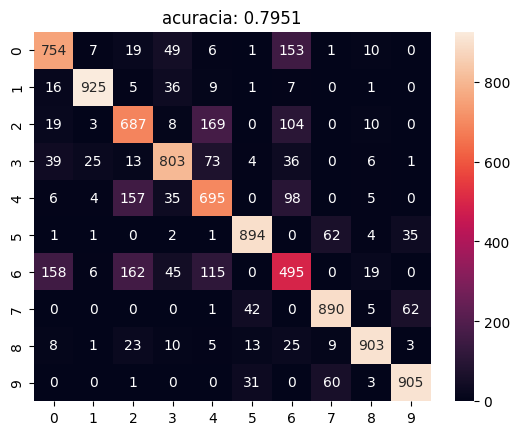

In [ ]:
plot_cm(y_test,y_pred)

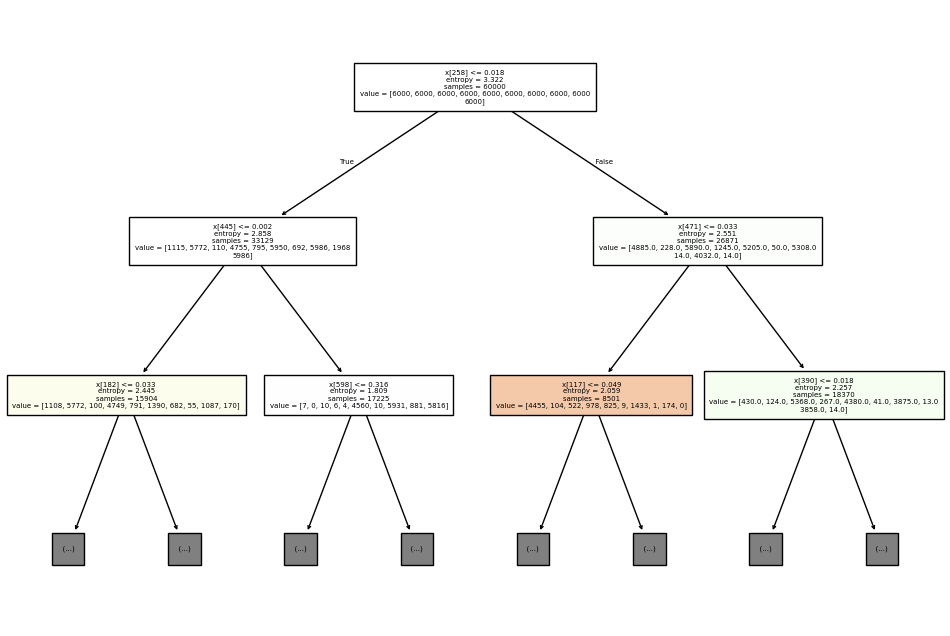

In [ ]:
##### visualizando a arvore
from sklearn.tree import plot_tree

best_tree = Random_tree.best_estimator_

plt.figure(figsize=(12, 8))
plot_tree(best_tree, max_depth=2, filled=True,fontsize=5)
plt.show()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression


In [ ]:
log_reg = LogisticRegression(
    class_weight='balanced', # balanceamento das classes
    solver='newton-cg',
    verbose=3,
    warm_start=True,
    n_jobs=-1 ######### utilizar todos os processadores disponíveis. só to fznd isso pq to rodando no colab. mt custoso
)

In [ ]:
log_reg.fit(
    X_train,
    y_train
)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


LogisticRegression(class_weight='balanced', n_jobs=-1, solver='newton-cg',
                   verbose=3, warm_start=True)

In [ ]:
y_pred = log_reg.predict(X_test)

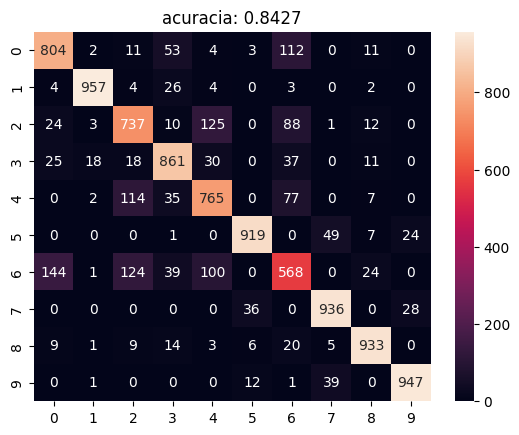

In [ ]:
plot_cm(y_test,y_pred)